In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import os
from termcolor import colored
from scipy import stats
import plotly.express as px
from plotly.figure_factory import create_scatterplotmatrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib.gridspec import GridSpec

In [75]:
data_train = pd.read_csv("/content/data_train.csv")
data_test = pd.read_csv("/content/data_test.csv")
y_test = data_test['Diabetes']

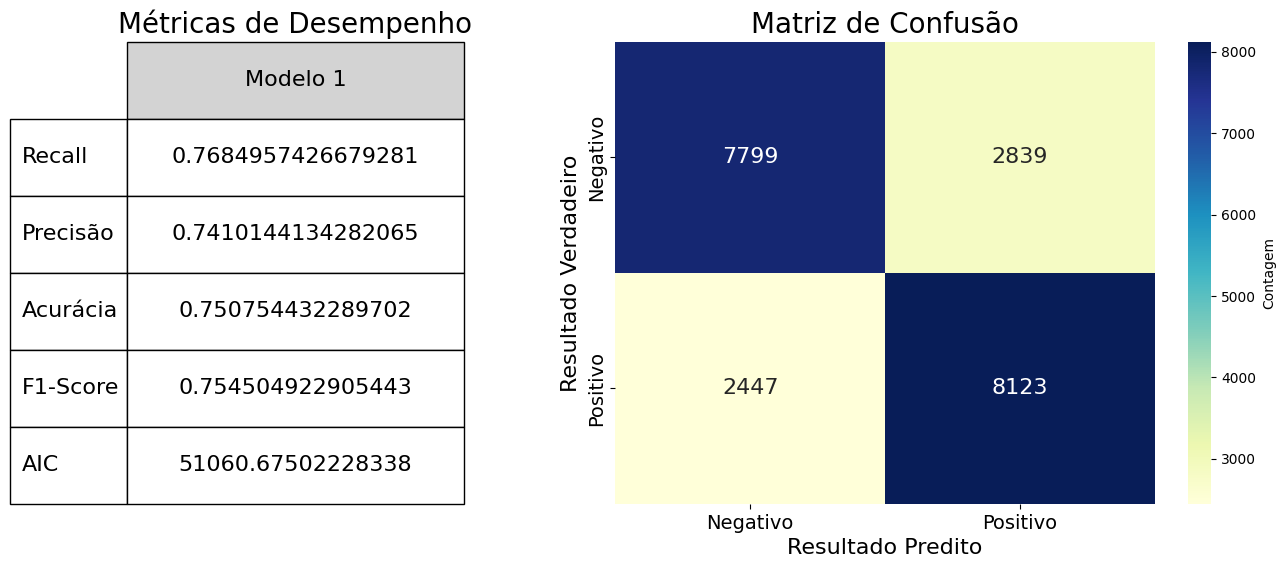

In [76]:
## Modelo com todas as covariáveis

model1 = smf.glm(formula = 'Diabetes ~ Age + Sex + HighChol + CholCheck + BMI + Smoker + HeartDiseaseorAttack + PhysActivity + Fruits + Veggies + HvyAlcoholConsump + GenHlth + MentHlth + PhysHlth + DiffWalk + Stroke + HighBP', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model1.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

arr_metr = np.array([[recall_score(data_test['Diabetes'], y_pred)], [precision_score(data_test['Diabetes'], y_pred)], [accuracy_score(data_test['Diabetes'], y_pred)], [f1_score(data_test['Diabetes'], y_pred)], [model1.aic]])
metricas = pd.DataFrame(arr_metr, index = ['Recall', 'Precisão', 'Acurácia', 'F1-Score', 'AIC'], columns = ['Modelo 1'])

matriz_conf = pd.DataFrame(confusion_matrix(data_test['Diabetes'], y_pred), index=['Negativo', 'Positivo'], columns=['Negativo', 'Positivo'])

fig = plt.figure(figsize=(15, 6))
gs = GridSpec(1, 2, width_ratios=[0.5, 1], wspace=0.3)  # Ajuste de wspace aqui

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.axis('off')
table = ax1.table(cellText=metricas.values, colLabels=metricas.columns, rowLabels=metricas.index, cellLoc='center', loc='center', colColours=["lightgrey"]*len(metricas.columns), bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(16)
ax1.set_title('Métricas de Desempenho', fontsize=20, loc='center')

sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="YlGnBu", ax=ax2, annot_kws={"size": 16}, cbar_kws={'label': 'Contagem'})
ax2.set_title('Matriz de Confusão', fontsize=20)
ax2.set_ylabel('Resultado Verdadeiro', fontsize=16)
ax2.set_xlabel('Resultado Predito', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)

plt.show()

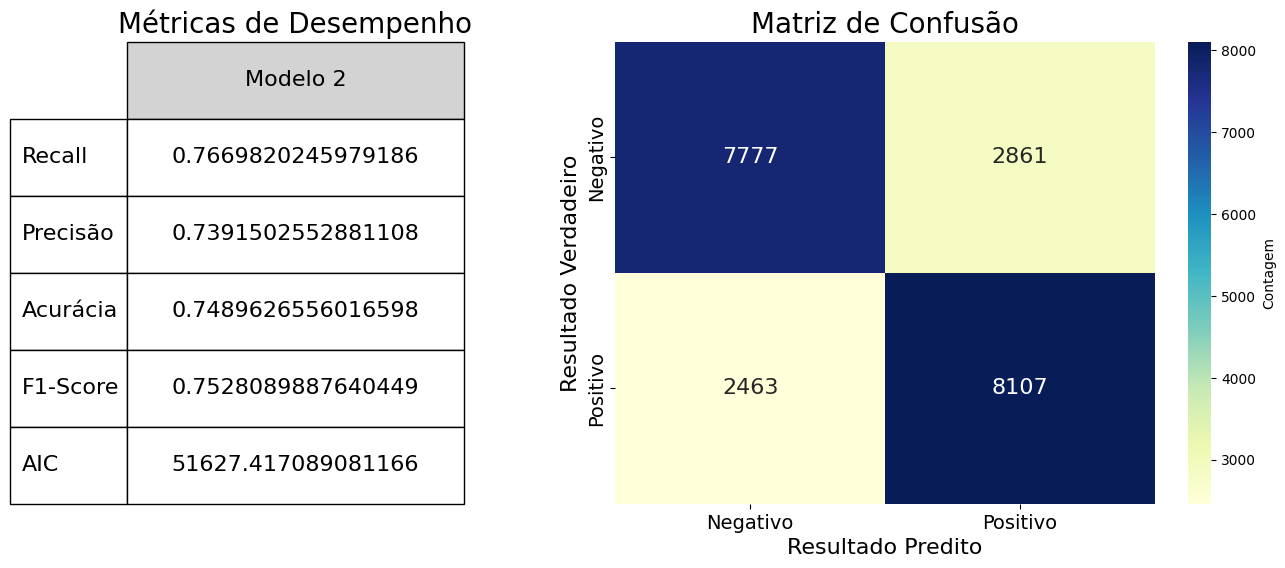

In [77]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.15

model2 = smf.glm(formula = 'Diabetes ~ Age + HighChol + BMI + HeartDiseaseorAttack + PhysActivity + GenHlth + PhysHlth + DiffWalk + HighBP', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model2.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

arr_metr = np.array([[recall_score(data_test['Diabetes'], y_pred)], [precision_score(data_test['Diabetes'], y_pred)], [accuracy_score(data_test['Diabetes'], y_pred)], [f1_score(data_test['Diabetes'], y_pred)], [model2.aic]])
metricas = pd.DataFrame(arr_metr, index = ['Recall', 'Precisão', 'Acurácia', 'F1-Score', 'AIC'], columns = ['Modelo 2'])

matriz_conf = pd.DataFrame(confusion_matrix(data_test['Diabetes'], y_pred), index=['Negativo', 'Positivo'], columns=['Negativo', 'Positivo'])

fig = plt.figure(figsize=(15, 6))
gs = GridSpec(1, 2, width_ratios=[0.5, 1], wspace=0.3)  # Ajuste de wspace aqui

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.axis('off')
table = ax1.table(cellText=metricas.values, colLabels=metricas.columns, rowLabels=metricas.index, cellLoc='center', loc='center', colColours=["lightgrey"]*len(metricas.columns), bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(16)
ax1.set_title('Métricas de Desempenho', fontsize=20, loc='center')

sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="YlGnBu", ax=ax2, annot_kws={"size": 16}, cbar_kws={'label': 'Contagem'})
ax2.set_title('Matriz de Confusão', fontsize=20)
ax2.set_ylabel('Resultado Verdadeiro', fontsize=16)
ax2.set_xlabel('Resultado Predito', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)

plt.show()

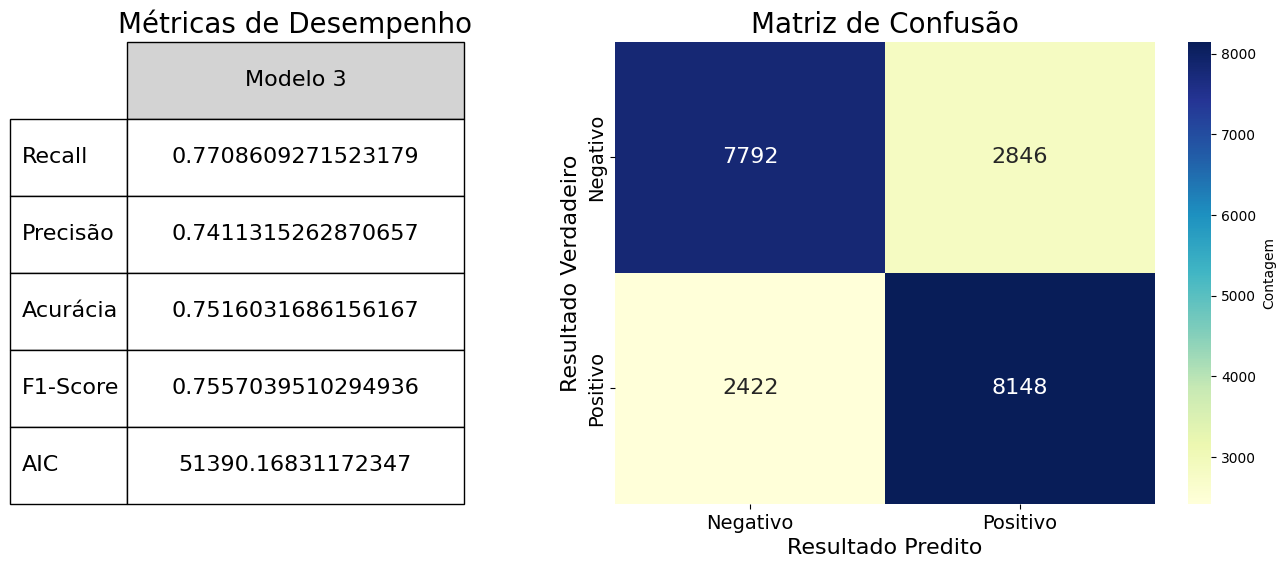

In [78]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.1

model3 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + BMI + HeartDiseaseorAttack + PhysActivity + GenHlth + PhysHlth + DiffWalk + Stroke + HighBP', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model3.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

arr_metr = np.array([[recall_score(data_test['Diabetes'], y_pred)], [precision_score(data_test['Diabetes'], y_pred)], [accuracy_score(data_test['Diabetes'], y_pred)], [f1_score(data_test['Diabetes'], y_pred)], [model3.aic]])
metricas = pd.DataFrame(arr_metr, index = ['Recall', 'Precisão', 'Acurácia', 'F1-Score', 'AIC'], columns = ['Modelo 3'])

matriz_conf = pd.DataFrame(confusion_matrix(data_test['Diabetes'], y_pred), index=['Negativo', 'Positivo'], columns=['Negativo', 'Positivo'])

fig = plt.figure(figsize=(15, 6))
gs = GridSpec(1, 2, width_ratios=[0.5, 1], wspace=0.3)  # Ajuste de wspace aqui

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.axis('off')
table = ax1.table(cellText=metricas.values, colLabels=metricas.columns, rowLabels=metricas.index, cellLoc='center', loc='center', colColours=["lightgrey"]*len(metricas.columns), bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(16)
ax1.set_title('Métricas de Desempenho', fontsize=20, loc='center')

sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="YlGnBu", ax=ax2, annot_kws={"size": 16}, cbar_kws={'label': 'Contagem'})
ax2.set_title('Matriz de Confusão', fontsize=20)
ax2.set_ylabel('Resultado Verdadeiro', fontsize=16)
ax2.set_xlabel('Resultado Predito', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)

plt.show()

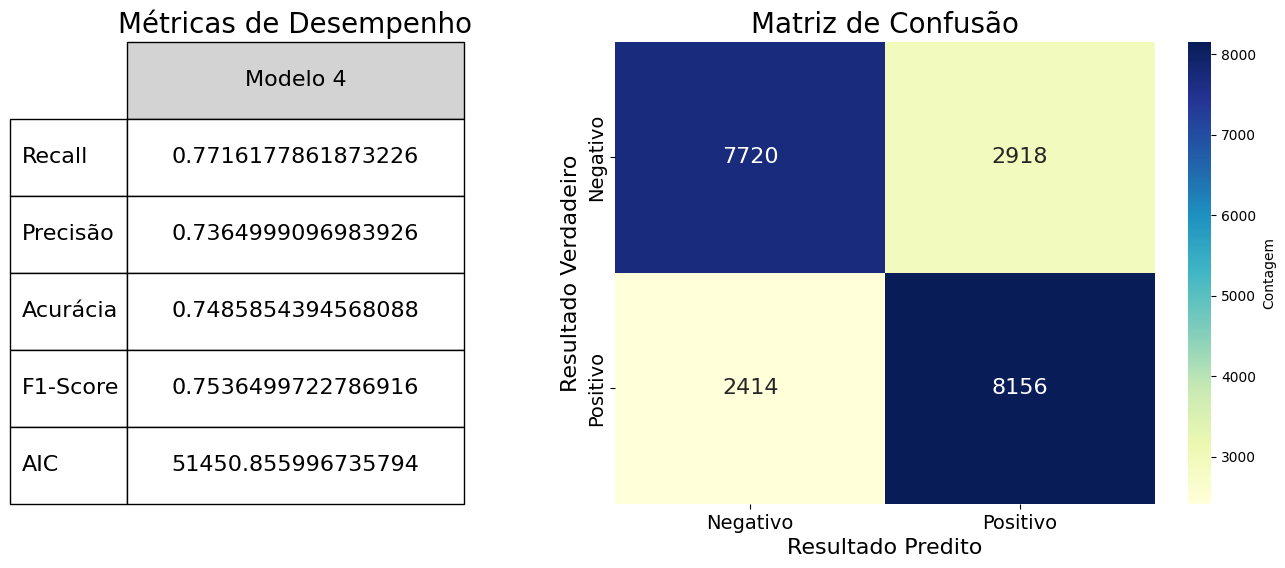

In [79]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.15 e considerando a alta correlação de GenHlth e PhysHlth

model4 = smf.glm(formula = 'Diabetes ~ Age + HighChol + BMI + HeartDiseaseorAttack + PhysActivity + GenHlth*PhysHlth + DiffWalk + HighBP', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model4.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

arr_metr = np.array([[recall_score(data_test['Diabetes'], y_pred)], [precision_score(data_test['Diabetes'], y_pred)], [accuracy_score(data_test['Diabetes'], y_pred)], [f1_score(data_test['Diabetes'], y_pred)], [model4.aic]])
metricas = pd.DataFrame(arr_metr, index = ['Recall', 'Precisão', 'Acurácia', 'F1-Score', 'AIC'], columns = ['Modelo 4'])

matriz_conf = pd.DataFrame(confusion_matrix(data_test['Diabetes'], y_pred), index=['Negativo', 'Positivo'], columns=['Negativo', 'Positivo'])

fig = plt.figure(figsize=(15, 6))
gs = GridSpec(1, 2, width_ratios=[0.5, 1], wspace=0.3)  # Ajuste de wspace aqui

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.axis('off')
table = ax1.table(cellText=metricas.values, colLabels=metricas.columns, rowLabels=metricas.index, cellLoc='center', loc='center', colColours=["lightgrey"]*len(metricas.columns), bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(16)
ax1.set_title('Métricas de Desempenho', fontsize=20, loc='center')

sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="YlGnBu", ax=ax2, annot_kws={"size": 16}, cbar_kws={'label': 'Contagem'})
ax2.set_title('Matriz de Confusão', fontsize=20)
ax2.set_ylabel('Resultado Verdadeiro', fontsize=16)
ax2.set_xlabel('Resultado Predito', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)

plt.show()

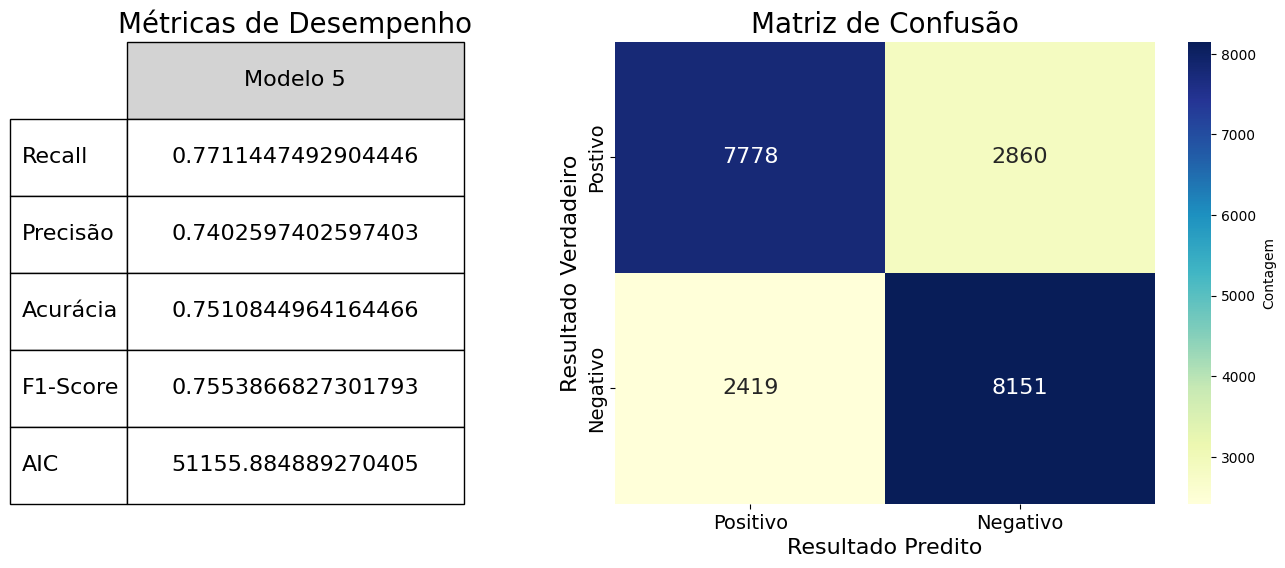

In [80]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.07

model5 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + BMI + Smoker + HeartDiseaseorAttack + PhysActivity + Veggies + HvyAlcoholConsump + GenHlth + MentHlth + PhysHlth + DiffWalk + Stroke + HighBP', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model5.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

arr_metr = np.array([[recall_score(data_test['Diabetes'], y_pred)], [precision_score(data_test['Diabetes'], y_pred)], [accuracy_score(data_test['Diabetes'], y_pred)], [f1_score(data_test['Diabetes'], y_pred)], [model5.aic]])
metricas = pd.DataFrame(arr_metr, index = ['Recall', 'Precisão', 'Acurácia', 'F1-Score', 'AIC'], columns = ['Modelo 5'])

matriz_conf = pd.DataFrame(confusion_matrix(data_test['Diabetes'], y_pred), index=['Postivo', 'Negativo'], columns=['Positivo', 'Negativo'])

fig = plt.figure(figsize=(15, 6))
gs = GridSpec(1, 2, width_ratios=[0.5, 1], wspace=0.3)  # Ajuste de wspace aqui

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.axis('off')
table = ax1.table(cellText=metricas.values, colLabels=metricas.columns, rowLabels=metricas.index, cellLoc='center', loc='center', colColours=["lightgrey"]*len(metricas.columns), bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(16)
ax1.set_title('Métricas de Desempenho', fontsize=20, loc='center')

sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="YlGnBu", ax=ax2, annot_kws={"size": 16}, cbar_kws={'label': 'Contagem'})
ax2.set_title('Matriz de Confusão', fontsize=20)
ax2.set_ylabel('Resultado Verdadeiro', fontsize=16)
ax2.set_xlabel('Resultado Predito', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)

plt.show()

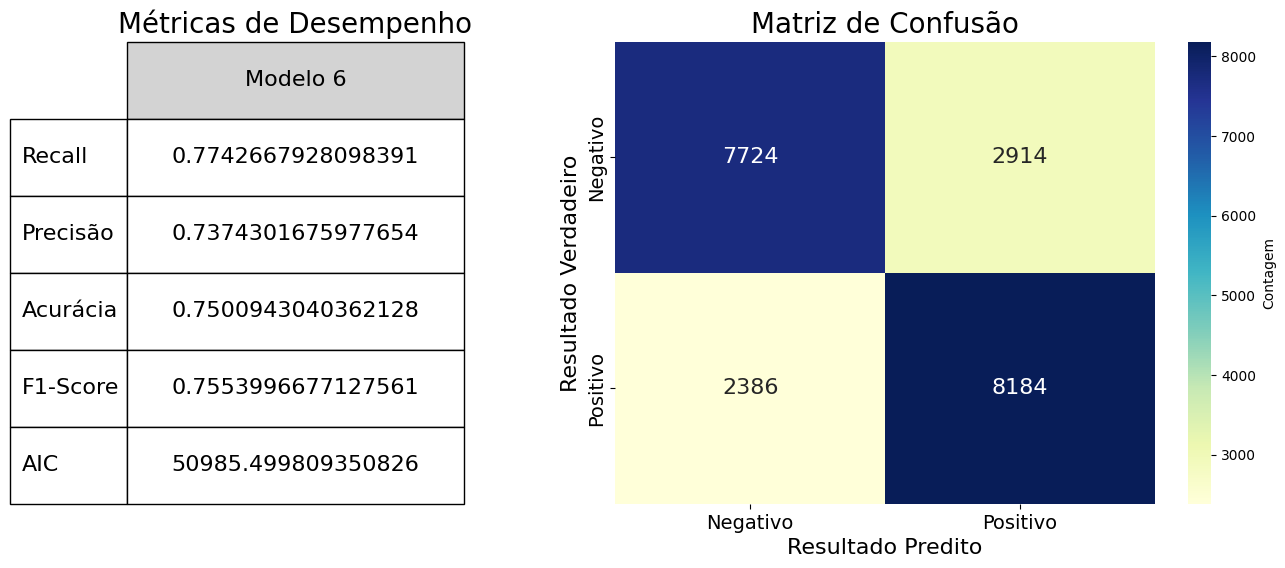

In [81]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.07 e considerando a alta correlação de GenHlth e PhysHlth

model6 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + BMI + Smoker + HeartDiseaseorAttack + PhysActivity + Veggies + HvyAlcoholConsump + MentHlth + GenHlth*PhysHlth + DiffWalk + Stroke + HighBP', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model6.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

arr_metr = np.array([[recall_score(data_test['Diabetes'], y_pred)], [precision_score(data_test['Diabetes'], y_pred)], [accuracy_score(data_test['Diabetes'], y_pred)], [f1_score(data_test['Diabetes'], y_pred)], [model6.aic]])
metricas = pd.DataFrame(arr_metr, index = ['Recall', 'Precisão', 'Acurácia', 'F1-Score', 'AIC'], columns = ['Modelo 6'])

matriz_conf = pd.DataFrame(confusion_matrix(data_test['Diabetes'], y_pred), index=['Negativo', 'Positivo'], columns=['Negativo', 'Positivo'])

fig = plt.figure(figsize=(15, 6))
gs = GridSpec(1, 2, width_ratios=[0.5, 1], wspace=0.3)  # Ajuste de wspace aqui

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.axis('off')
table = ax1.table(cellText=metricas.values, colLabels=metricas.columns, rowLabels=metricas.index, cellLoc='center', loc='center', colColours=["lightgrey"]*len(metricas.columns), bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(16)
ax1.set_title('Métricas de Desempenho', fontsize=20, loc='center')

sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="YlGnBu", ax=ax2, annot_kws={"size": 16}, cbar_kws={'label': 'Contagem'})
ax2.set_title('Matriz de Confusão', fontsize=20)
ax2.set_ylabel('Resultado Verdadeiro', fontsize=16)
ax2.set_xlabel('Resultado Predito', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)

plt.show()

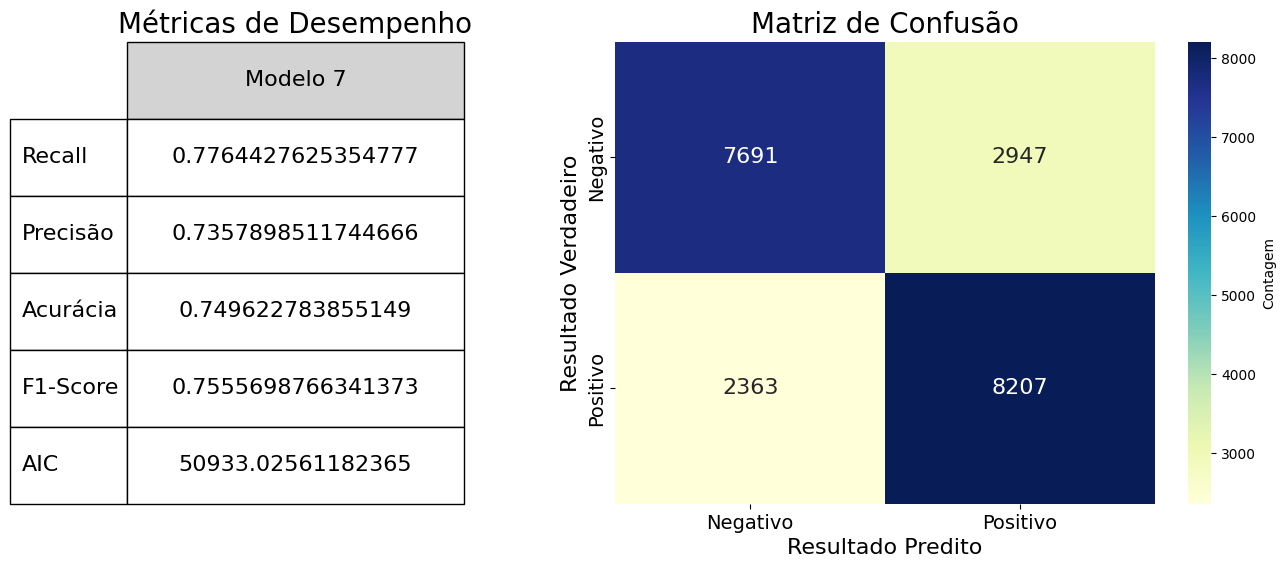

In [82]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.07 e considerando a alta correlação de GenHlth, PhysHlth e DiffWalk

model7 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + BMI + Smoker + HeartDiseaseorAttack + PhysActivity + Veggies + HvyAlcoholConsump + MentHlth + GenHlth*PhysHlth*DiffWalk + Stroke + HighBP', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model7.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

arr_metr = np.array([[recall_score(data_test['Diabetes'], y_pred)], [precision_score(data_test['Diabetes'], y_pred)], [accuracy_score(data_test['Diabetes'], y_pred)], [f1_score(data_test['Diabetes'], y_pred)], [model7.aic]])
metricas = pd.DataFrame(arr_metr, index = ['Recall', 'Precisão', 'Acurácia', 'F1-Score', 'AIC'], columns = ['Modelo 7'])

matriz_conf = pd.DataFrame(confusion_matrix(data_test['Diabetes'], y_pred), index=['Negativo', 'Positivo'], columns=['Negativo', 'Positivo'])

fig = plt.figure(figsize=(15, 6))
gs = GridSpec(1, 2, width_ratios=[0.5, 1], wspace=0.3)  # Ajuste de wspace aqui

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.axis('off')
table = ax1.table(cellText=metricas.values, colLabels=metricas.columns, rowLabels=metricas.index, cellLoc='center', loc='center', colColours=["lightgrey"]*len(metricas.columns), bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(16)
ax1.set_title('Métricas de Desempenho', fontsize=20, loc='center')

sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="YlGnBu", ax=ax2, annot_kws={"size": 16}, cbar_kws={'label': 'Contagem'})
ax2.set_title('Matriz de Confusão', fontsize=20)
ax2.set_ylabel('Resultado Verdadeiro', fontsize=16)
ax2.set_xlabel('Resultado Predito', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)

plt.show()

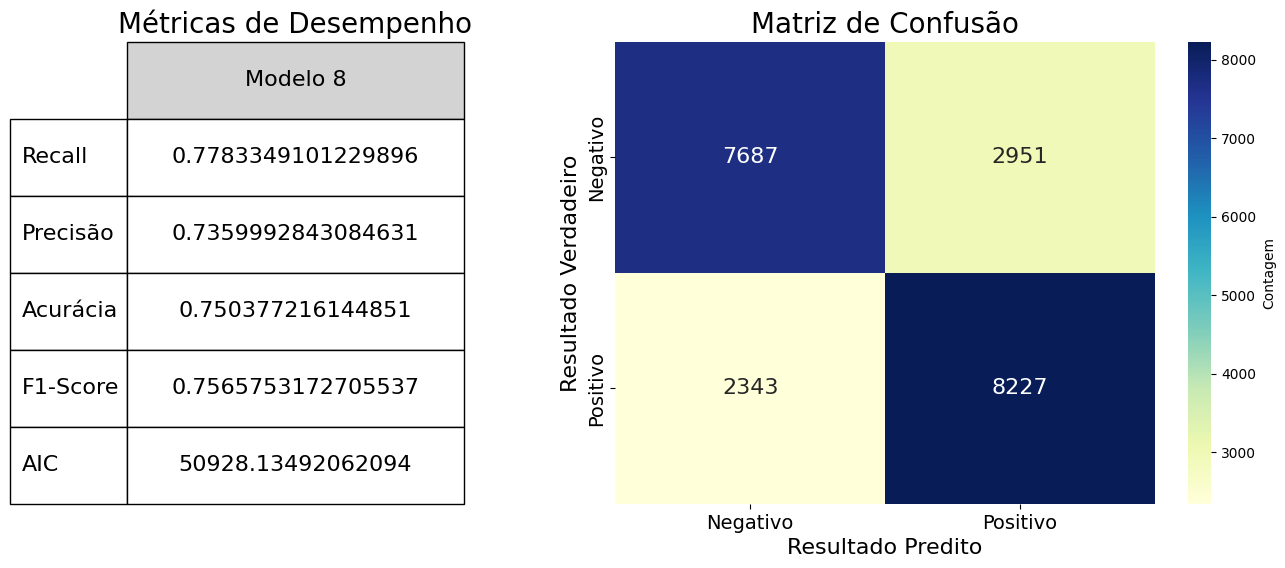

In [83]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.07 e considerando a alta correlação de GenHlth, PhysHlth, DiffWalk e MentHlth

model8 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + BMI + Smoker + HeartDiseaseorAttack + PhysActivity + Veggies + HvyAlcoholConsump + MentHlth*GenHlth*PhysHlth*DiffWalk + Stroke + HighBP', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model8.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

arr_metr = np.array([[recall_score(data_test['Diabetes'], y_pred)], [precision_score(data_test['Diabetes'], y_pred)], [accuracy_score(data_test['Diabetes'], y_pred)], [f1_score(data_test['Diabetes'], y_pred)], [model8.aic]])
metricas = pd.DataFrame(arr_metr, index = ['Recall', 'Precisão', 'Acurácia', 'F1-Score', 'AIC'], columns = ['Modelo 8'])

matriz_conf = pd.DataFrame(confusion_matrix(data_test['Diabetes'], y_pred), index=['Negativo', 'Positivo'], columns=['Negativo', 'Positivo'])

fig = plt.figure(figsize=(15, 6))
gs = GridSpec(1, 2, width_ratios=[0.5, 1], wspace=0.3)  # Ajuste de wspace aqui

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.axis('off')
table = ax1.table(cellText=metricas.values, colLabels=metricas.columns, rowLabels=metricas.index, cellLoc='center', loc='center', colColours=["lightgrey"]*len(metricas.columns), bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(16)
ax1.set_title('Métricas de Desempenho', fontsize=20, loc='center')

sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="YlGnBu", ax=ax2, annot_kws={"size": 16}, cbar_kws={'label': 'Contagem'})
ax2.set_title('Matriz de Confusão', fontsize=20)
ax2.set_ylabel('Resultado Verdadeiro', fontsize=16)
ax2.set_xlabel('Resultado Predito', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)

plt.show()

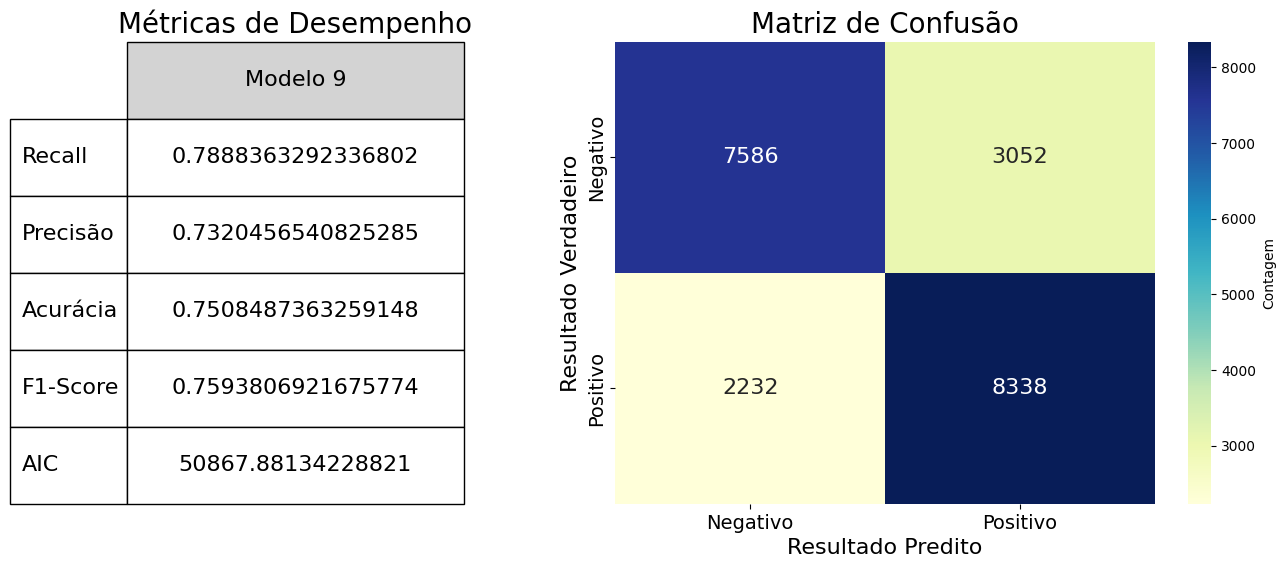

In [84]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.07 e considerando a alta correlação de GenHlth, PhysHlth, DiffWalk, MentHlth e HighBP

model9 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + BMI + Smoker + HeartDiseaseorAttack + PhysActivity + Veggies + HvyAlcoholConsump + MentHlth*GenHlth*PhysHlth*DiffWalk*HighBP + Stroke', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model9.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

arr_metr = np.array([[recall_score(data_test['Diabetes'], y_pred)], [precision_score(data_test['Diabetes'], y_pred)], [accuracy_score(data_test['Diabetes'], y_pred)], [f1_score(data_test['Diabetes'], y_pred)], [model9.aic]])
metricas = pd.DataFrame(arr_metr, index = ['Recall', 'Precisão', 'Acurácia', 'F1-Score', 'AIC'], columns = ['Modelo 9'])

matriz_conf = pd.DataFrame(confusion_matrix(data_test['Diabetes'], y_pred), index=['Negativo', 'Positivo'], columns=['Negativo', 'Positivo'])

fig = plt.figure(figsize=(15, 6))
gs = GridSpec(1, 2, width_ratios=[0.5, 1], wspace=0.3)  # Ajuste de wspace aqui

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.axis('off')
table = ax1.table(cellText=metricas.values, colLabels=metricas.columns, rowLabels=metricas.index, cellLoc='center', loc='center', colColours=["lightgrey"]*len(metricas.columns), bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(16)
ax1.set_title('Métricas de Desempenho', fontsize=20, loc='center')

sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="YlGnBu", ax=ax2, annot_kws={"size": 16}, cbar_kws={'label': 'Contagem'})
ax2.set_title('Matriz de Confusão', fontsize=20)
ax2.set_ylabel('Resultado Verdadeiro', fontsize=16)
ax2.set_xlabel('Resultado Predito', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)

plt.show()

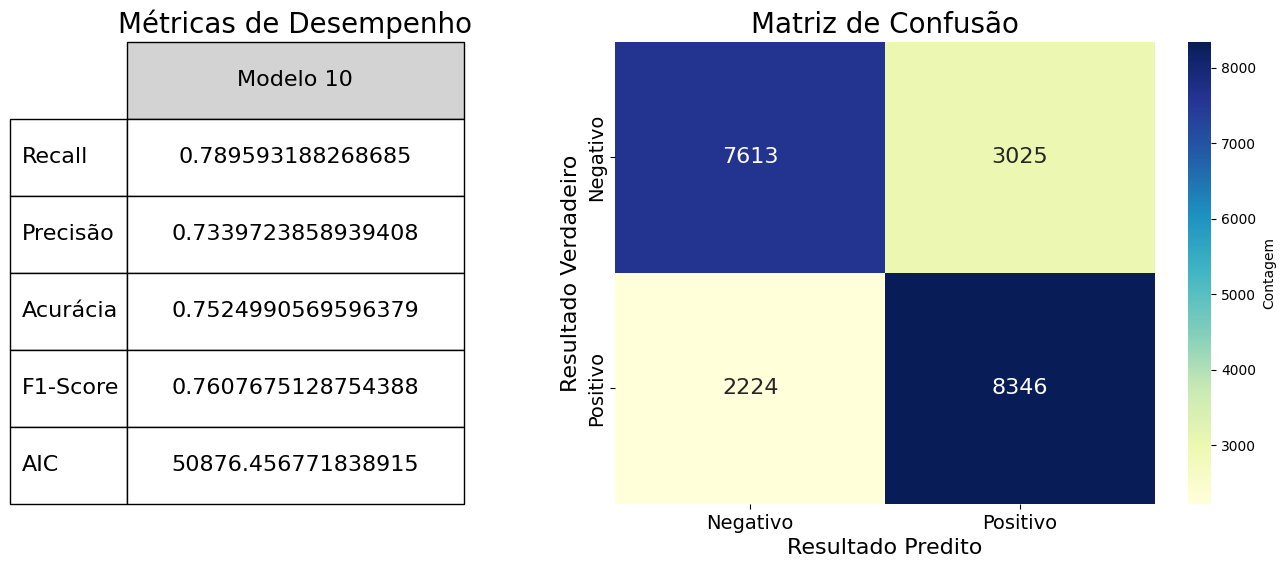

In [85]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.07 e considerando a alta correlação de GenHlth, PhysHlth, DiffWalk, MentHlth, HighBP e BMI

model10 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + Smoker + HeartDiseaseorAttack + PhysActivity + Veggies + HvyAlcoholConsump +  BMI*MentHlth*GenHlth*PhysHlth*DiffWalk*HighBP + Stroke', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model10.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

arr_metr = np.array([[recall_score(data_test['Diabetes'], y_pred)], [precision_score(data_test['Diabetes'], y_pred)], [accuracy_score(data_test['Diabetes'], y_pred)], [f1_score(data_test['Diabetes'], y_pred)], [model10.aic]])
metricas = pd.DataFrame(arr_metr, index = ['Recall', 'Precisão', 'Acurácia', 'F1-Score', 'AIC'], columns = ['Modelo 10'])

matriz_conf = pd.DataFrame(confusion_matrix(data_test['Diabetes'], y_pred), index=['Negativo', 'Positivo'], columns=['Negativo', 'Positivo'])

fig = plt.figure(figsize=(15, 6))
gs = GridSpec(1, 2, width_ratios=[0.5, 1], wspace=0.3)  # Ajuste de wspace aqui

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.axis('off')
table = ax1.table(cellText=metricas.values, colLabels=metricas.columns, rowLabels=metricas.index, cellLoc='center', loc='center', colColours=["lightgrey"]*len(metricas.columns), bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(16)
ax1.set_title('Métricas de Desempenho', fontsize=20, loc='center')

sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="YlGnBu", ax=ax2, annot_kws={"size": 16}, cbar_kws={'label': 'Contagem'})
ax2.set_title('Matriz de Confusão', fontsize=20)
ax2.set_ylabel('Resultado Verdadeiro', fontsize=16)
ax2.set_xlabel('Resultado Predito', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)

plt.show()

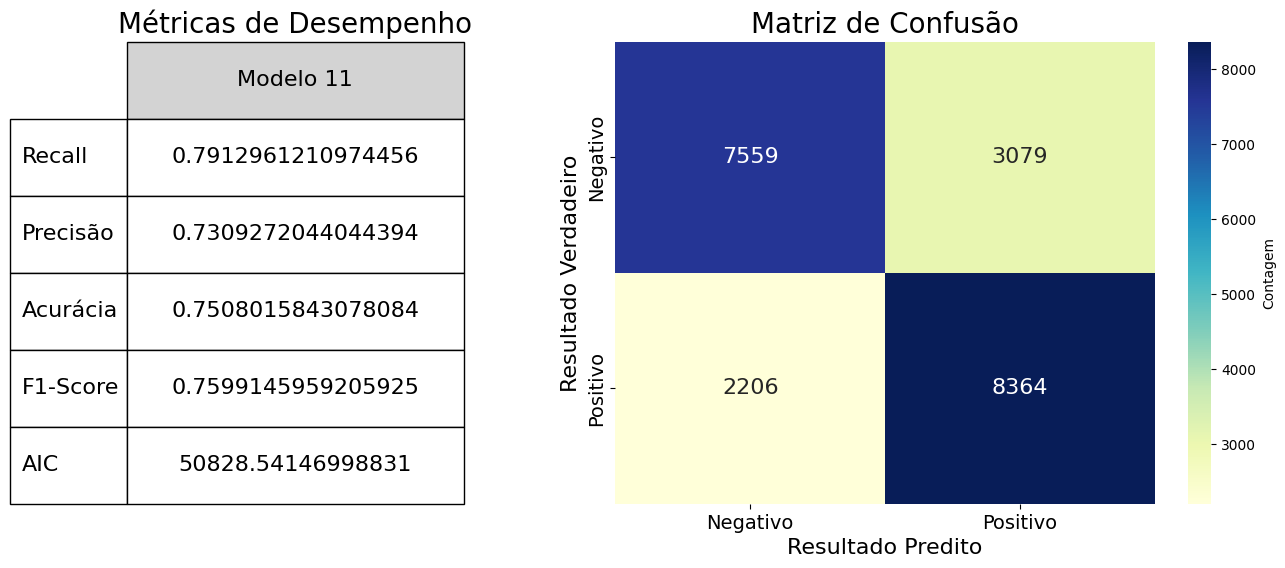

In [86]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.07 e considerando a alta correlação de GenHlth, PhysHlth, DiffWalk, MentHlth, HighBP e HeartDiseaseorAttack

model11 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + BMI + Smoker  + PhysActivity + Veggies + HvyAlcoholConsump +  HeartDiseaseorAttack*MentHlth*GenHlth*PhysHlth*DiffWalk*HighBP + Stroke', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model11.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

arr_metr = np.array([[recall_score(data_test['Diabetes'], y_pred)], [precision_score(data_test['Diabetes'], y_pred)], [accuracy_score(data_test['Diabetes'], y_pred)], [f1_score(data_test['Diabetes'], y_pred)], [model11.aic]])
metricas = pd.DataFrame(arr_metr, index = ['Recall', 'Precisão', 'Acurácia', 'F1-Score', 'AIC'], columns = ['Modelo 11'])

matriz_conf = pd.DataFrame(confusion_matrix(data_test['Diabetes'], y_pred), index=['Negativo', 'Positivo'], columns=['Negativo', 'Positivo'])

fig = plt.figure(figsize=(15, 6))
gs = GridSpec(1, 2, width_ratios=[0.5, 1], wspace=0.3)  # Ajuste de wspace aqui

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.axis('off')
table = ax1.table(cellText=metricas.values, colLabels=metricas.columns, rowLabels=metricas.index, cellLoc='center', loc='center', colColours=["lightgrey"]*len(metricas.columns), bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(16)
ax1.set_title('Métricas de Desempenho', fontsize=20, loc='center')

sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="YlGnBu", ax=ax2, annot_kws={"size": 16}, cbar_kws={'label': 'Contagem'})
ax2.set_title('Matriz de Confusão', fontsize=20)
ax2.set_ylabel('Resultado Verdadeiro', fontsize=16)
ax2.set_xlabel('Resultado Predito', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)

plt.show()


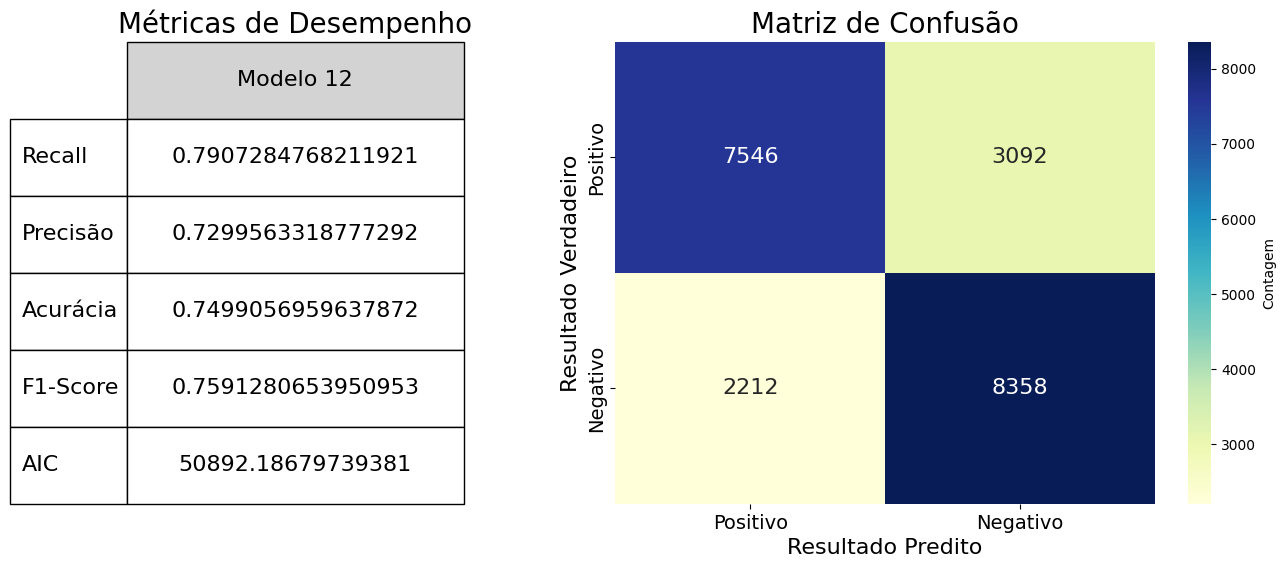

In [87]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.07 e considerando a alta correlação de GenHlth, PhysHlth, DiffWalk, MentHlth, HighBP e o absoluto de PhysActivity

model12 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + BMI + Smoker + Veggies + HvyAlcoholConsump + PhysActivity*HeartDiseaseorAttack*MentHlth*GenHlth*PhysHlth*DiffWalk*HighBP + Stroke', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model12.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

arr_metr = np.array([[recall_score(data_test['Diabetes'], y_pred)], [precision_score(data_test['Diabetes'], y_pred)], [accuracy_score(data_test['Diabetes'], y_pred)], [f1_score(data_test['Diabetes'], y_pred)], [model12.aic]])
metricas = pd.DataFrame(arr_metr, index = ['Recall', 'Precisão', 'Acurácia', 'F1-Score', 'AIC'], columns = ['Modelo 12'])

matriz_conf = pd.DataFrame(confusion_matrix(data_test['Diabetes'], y_pred), index=['Positivo', 'Negativo'], columns=['Positivo', 'Negativo'])

fig = plt.figure(figsize=(15, 6))
gs = GridSpec(1, 2, width_ratios=[0.5, 1], wspace=0.3)  # Ajuste de wspace aqui

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.axis('off')
table = ax1.table(cellText=metricas.values, colLabels=metricas.columns, rowLabels=metricas.index, cellLoc='center', loc='center', colColours=["lightgrey"]*len(metricas.columns), bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(16)
ax1.set_title('Métricas de Desempenho', fontsize=20, loc='center')

sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="YlGnBu", ax=ax2, annot_kws={"size": 16}, cbar_kws={'label': 'Contagem'})
ax2.set_title('Matriz de Confusão', fontsize=20)
ax2.set_ylabel('Resultado Verdadeiro', fontsize=16)
ax2.set_xlabel('Resultado Predito', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)

plt.show()


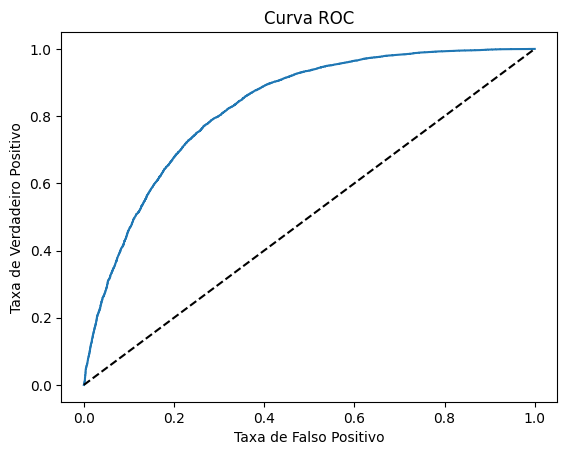

0.8270003973545506


In [88]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = model10.predict(data_test)

fpr10, tpr10, thresholds = roc_curve(data_test['Diabetes'], y_proba)

area10 = roc_auc_score(data_test['Diabetes'], y_proba)

plt.plot(fpr10, tpr10)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.show()

print(area10)

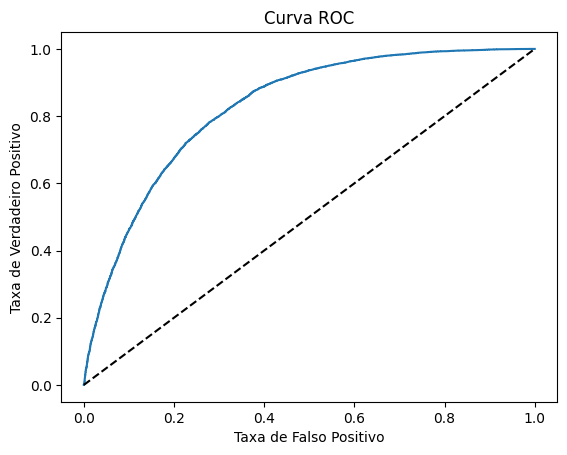

0.8268131213445026


In [89]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = model11.predict(data_test)

fpr11, tpr11, thresholds = roc_curve(data_test['Diabetes'], y_proba)

area11 = roc_auc_score(data_test['Diabetes'], y_proba)

plt.plot(fpr11, tpr11)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.show()

print(area11)

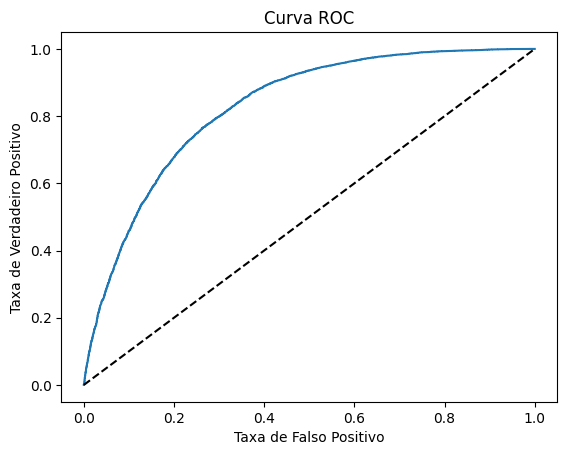

0.8265943451147


In [90]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = model12.predict(data_test)

fpr12, tpr12, thresholds = roc_curve(data_test['Diabetes'], y_proba)

area12 = roc_auc_score(data_test['Diabetes'], y_proba)

plt.plot(fpr12, tpr12)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.show()

print(area12)

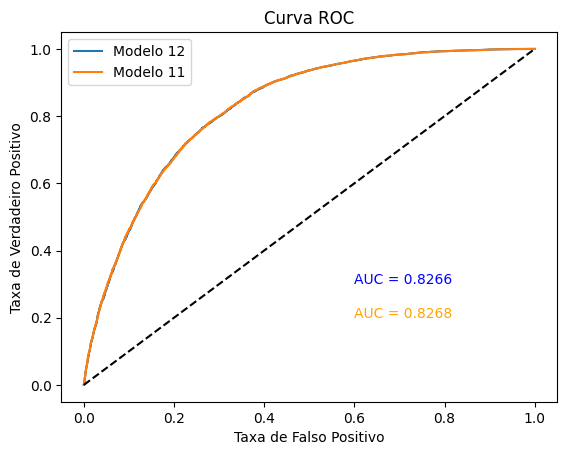

In [91]:
plt.plot(fpr12, tpr12)
plt.plot(fpr11, tpr11)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(['Modelo 12', 'Modelo 11'])
plt.text(0.6, 0.3, 'AUC = %0.4f' % area12, color='blue')
plt.text(0.6, 0.2, 'AUC = %0.4f' % area11, color='orange')

plt.show()